## make_mockobs_forPieterandBob

Script that runs the making mock observations scripts and output is specifically given to Pieter and Bob/ my paper.

In [106]:
%run 'make_mockobs.ipynb'

In [2]:
machine='chinook'

In [3]:
resolution = None;  # This should prompt the script to just use the lowest resolution 

slicewidth = 20; 
exptime = 1000.*60.*60.; 
CMOS = True; ROnoise= None; 
x_center = 50.5; y_center = 13.5

****** Working on mock observation for distance 100Mpc ******
loading the data...
Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,6.40094057981 appended.
DEBUG: the resolution outputted from load_data is 6.40094057981
extracting the FOV...
making a mask for the data


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The current mask is [[-0.5609471201896667 -0.5673826336860657 -0.5707893371582031 ...,
  -1.6017686128616333 -1.5907478332519531 -1.580721139907837]
 [-0.5927731990814209 -0.6027000546455383 -0.6099472641944885 ...,
  -1.6161918640136719 -1.6040723323822021 -1.5926581621170044]
 [-0.6216232180595398 -0.6346660852432251 -0.6453272104263306 ...,
  -1.6309171915054321 -1.61774742603302 -1.6050255298614502]
 ..., 
 [-1.5873242616653442 -1.5931445360183716 -1.5988320112228394 ...,
  -2.086695671081543 -2.0889346599578857 -2.090973138809204]
 [-1.5847303867340088 -1.5903996229171753 -1.595850944519043 ...,
  -2.0886385440826416 -2.0909883975982666 -2.0931239128112793]
 [-1.5825705528259277 -1.5880998373031616 -1.593294382095337 ...,
  -2.0907442569732666 -2.093170166015625 -2.0953640937805176]]
adding noise to the data...
******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 6.40094057981


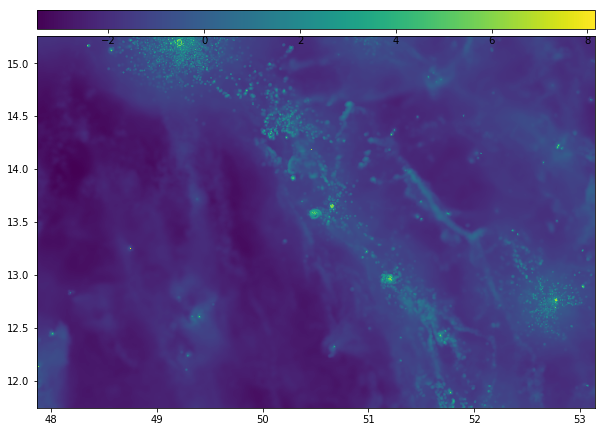

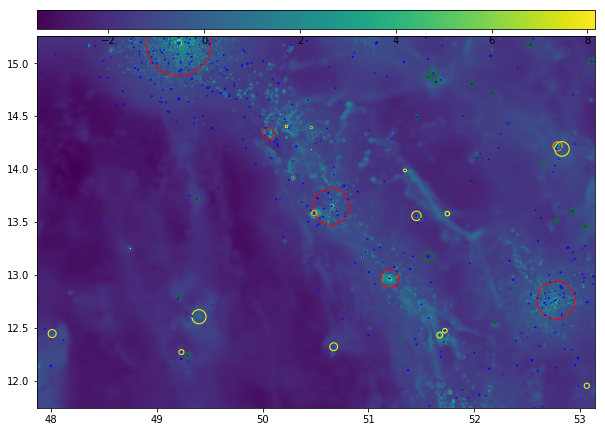

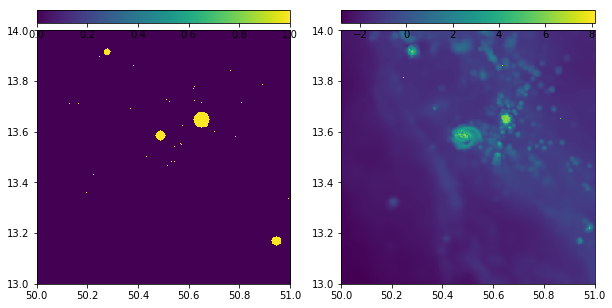

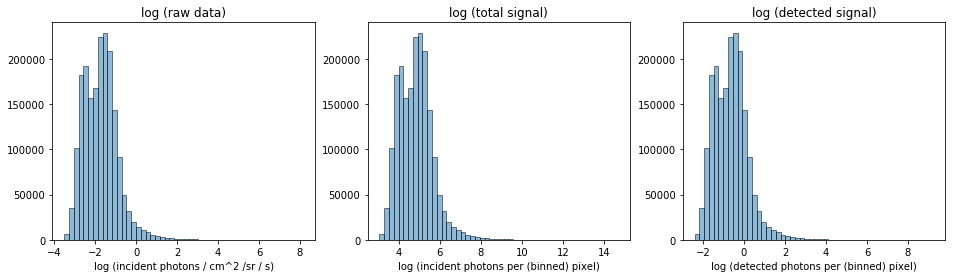

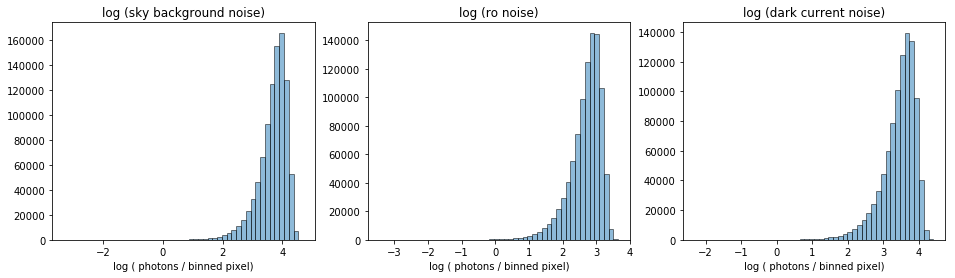

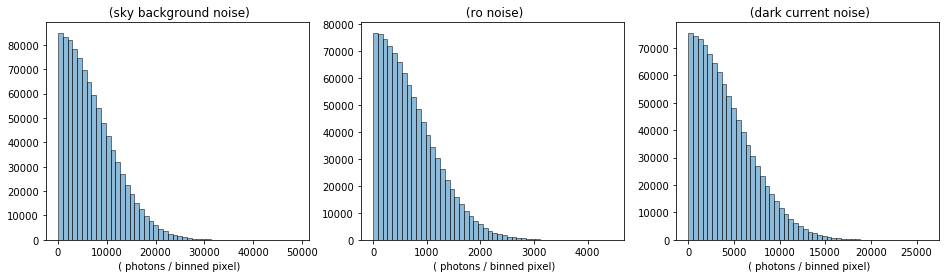

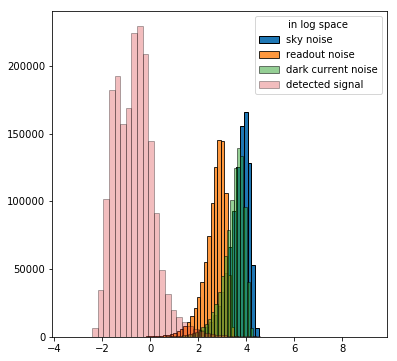

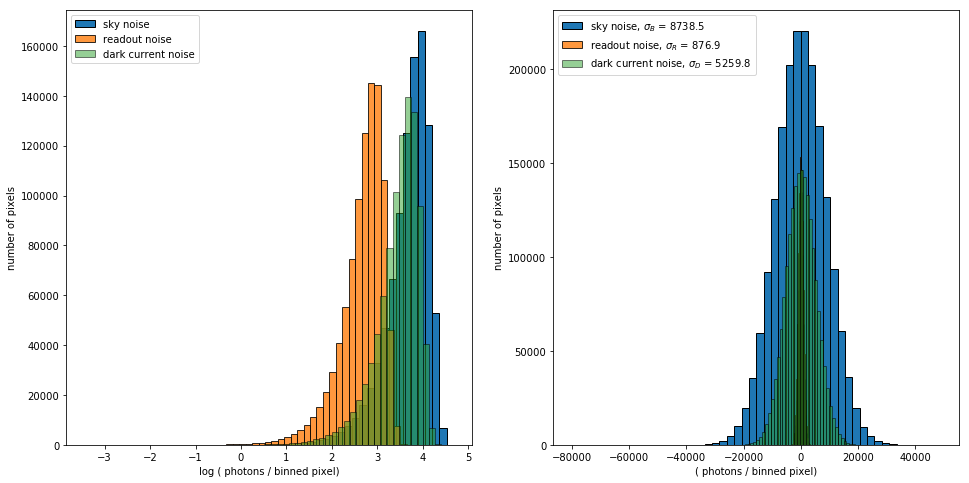

In [107]:
#distance = '500Mpc'
#data_FOV_500, xystarts_500, size_500, noiseadded_signal_500, B_sky_array_500, R_array_500,D_array500 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center)

#distance = '200Mpc'
#data_FOV_200, xystarts_200, size_200, noiseadded_signal_200, B_sky_array_200, R_array_200,D_array200 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center)

distance = '100Mpc'
data_FOV_100, xystarts_100, size_100, noiseadded_signal_100, B_sky_array_100, R_array_100,D_array100, mask_100 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center,includemeannoise=True,mask=True,debug=True,plotchecks=True)

#distance = '50Mpc'
#data_FOV_50, xystarts_50, size_50, noiseadded_signal_50, B_sky_array_50, R_array_50,D_array50 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center)

(1688, 1124) (1688, 1124) (1688, 1124) (1688, 1124)


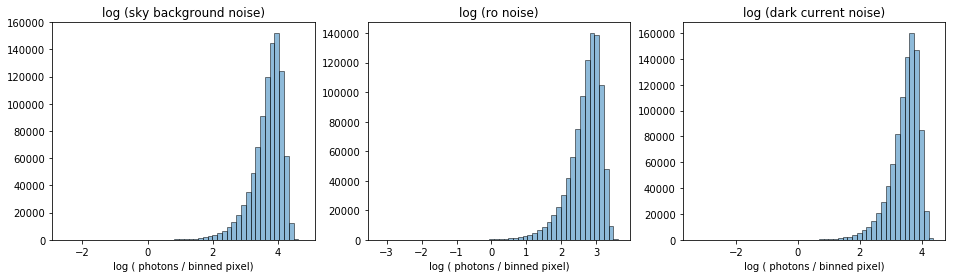

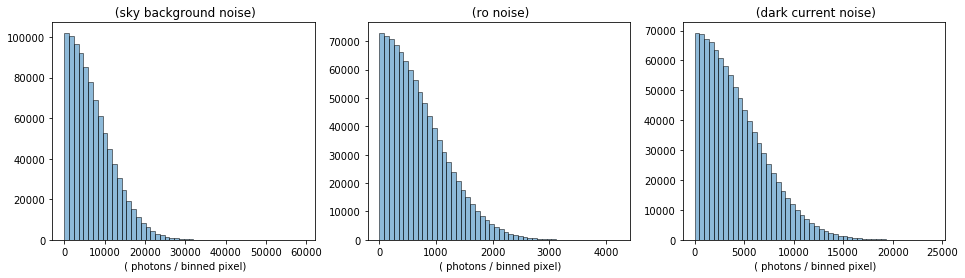

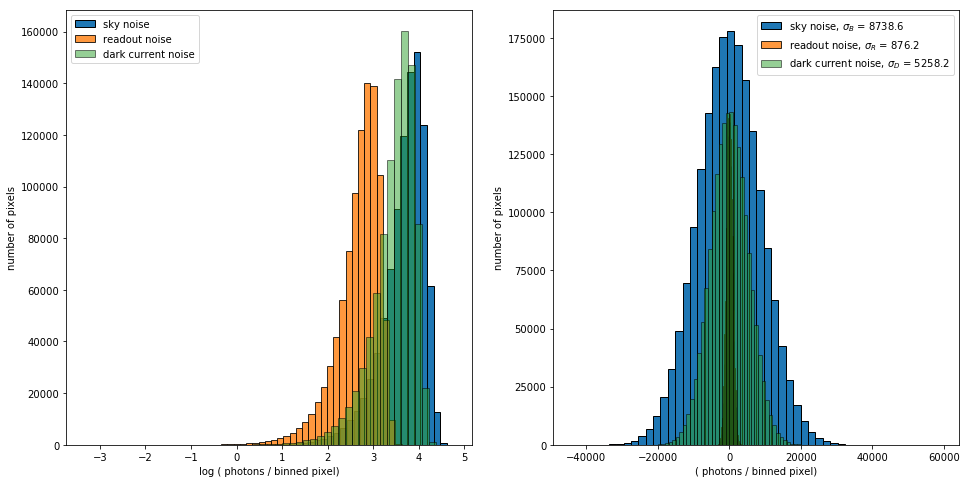

In [5]:
print data_FOV_100.shape, B_sky_array_100.shape, R_array_100.shape, D_array100.shape

plotchecks(B_sky_array_100, R_array_100, D_array100)

In [108]:

mx_simulation = np.ma.masked_array(data_FOV_100, mask=mask_100)


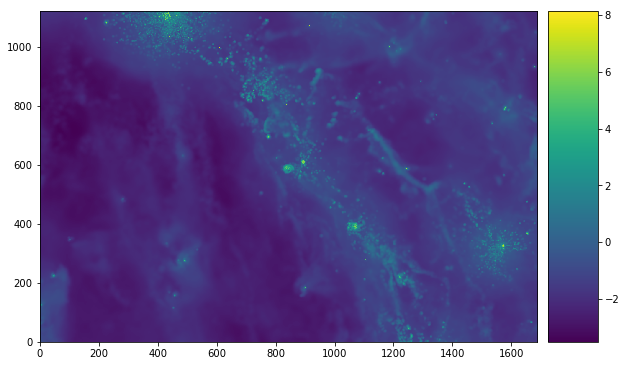

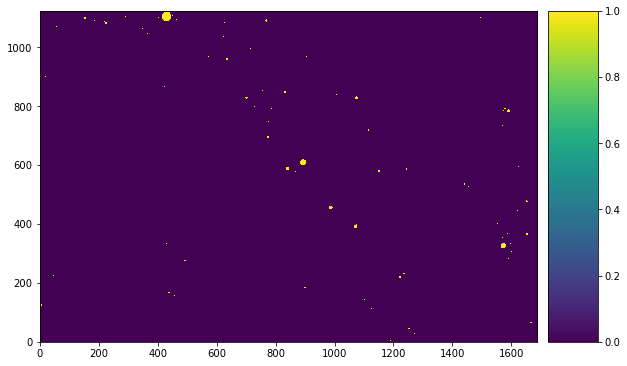

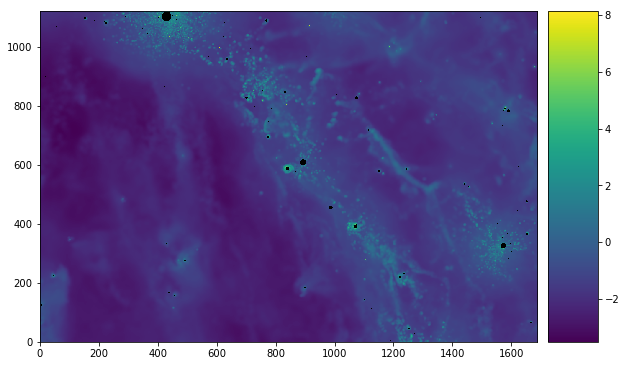

In [109]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(data_FOV_100.T,ax=ax1,colorbar=True)#,bounds=bounds)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(mask_100.T,ax=ax1,colorbar=True)#,bounds=bounds)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(mx_simulation.T,ax=ax1,colorbar=True)#,bounds=bounds)

plt.savefig('first_masked_FOV_forobservation.png')

In [110]:
mx_noisy = np.ma.masked_array(noiseadded_signal_100, mask=mask_100)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


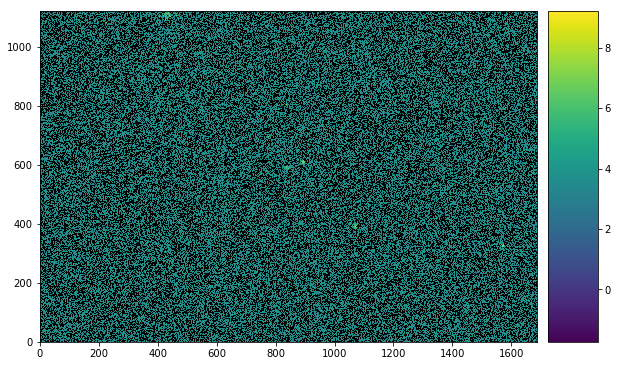

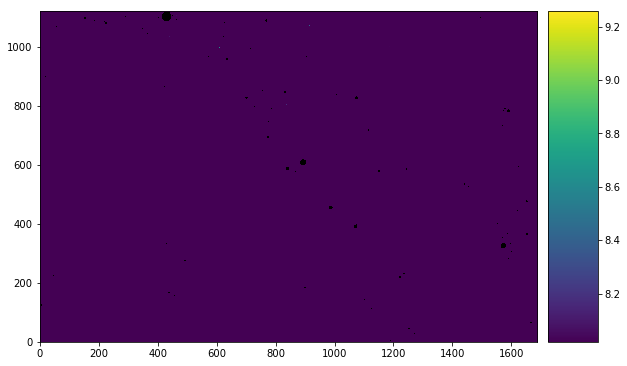

In [111]:
#fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
#niceplot(noiseadded_signal_100-768000.0-27648000.0-76310797.0337, ax=ax1)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(np.log10(noiseadded_signal_100-768000.0-27648000.0-76310797.0337).T,ax=ax1,colorbar=True)#,bounds=bounds)
# subtracted off the mean noise I added in - it is printed out above

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(np.log10(mx_noisy).T,ax=ax1,colorbar=True)#,bounds=bounds)


In [10]:
noiseadded_signal_100.shape

(1688, 1124)

### upload the old data that I sent to Pieter and Bob ...
... it is slightly different because is half the resolution, but should look similar

In [10]:
from astropy.io import fits
olddata = fits.getdata('toPieterBob/noisy_fov_1000.0hr_newcam_100Mpcdist_14.0arcsec_20slwd_xycenter_50.5_13.5.fits')
olddata.shape

IOError: [Errno 2] No such file or directory: 'toPieterBob/noisy_fov_1000.0hr_newcam_100Mpcdist_14.0arcsec_20slwd_xycenter_50.5_13.5.fits'

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


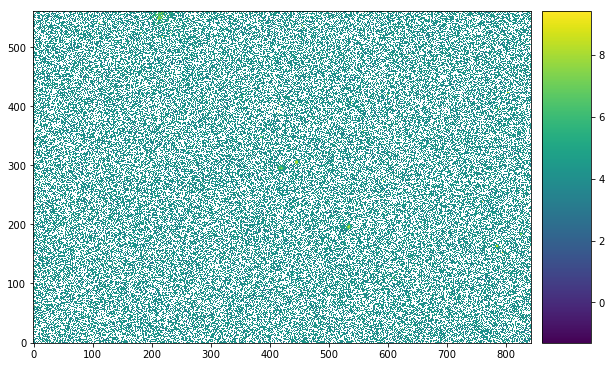

In [12]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(np.log10(olddata).T,ax=ax1,colorbar=True)#,bounds=bounds)

### They look similar! 
... Now, I can try binning the data.  First I will zoom in on the middle part and look at the mask applied to the data.

In [113]:
rawsim_cutout = data_FOV_100[800:1000,500:700]
rawsimmasked = np.ma.masked_array(data_FOV_100, mask=mask_100)
rawsimmasked_cutout = rawsimmasked[800:1000,500:700]

noise_cutout = noiseadded_signal_100[800:1000,500:700]
#mx_noisy = np.ma.masked_array(noiseadded_signal_100-768000.0-27648000.0-76310797.0337, mask=mask_100)
mx_noisy = np.ma.masked_array(noiseadded_signal_100, mask=mask_100)
noisemasked_cutout = mx_noisy[800:1000,500:700]

mx_noisy.data.shape

(1688, 1124)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log10


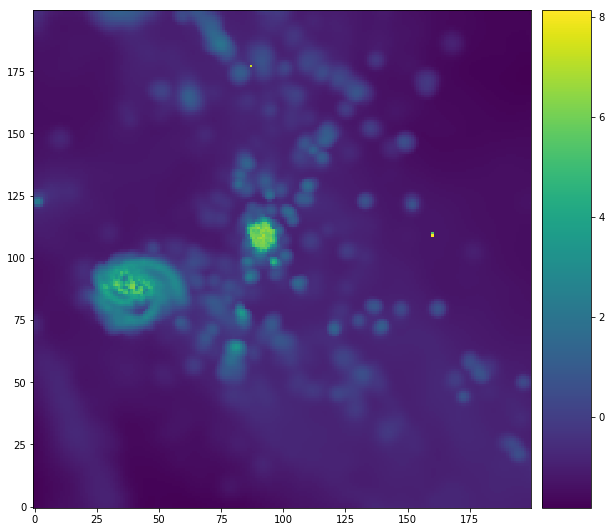

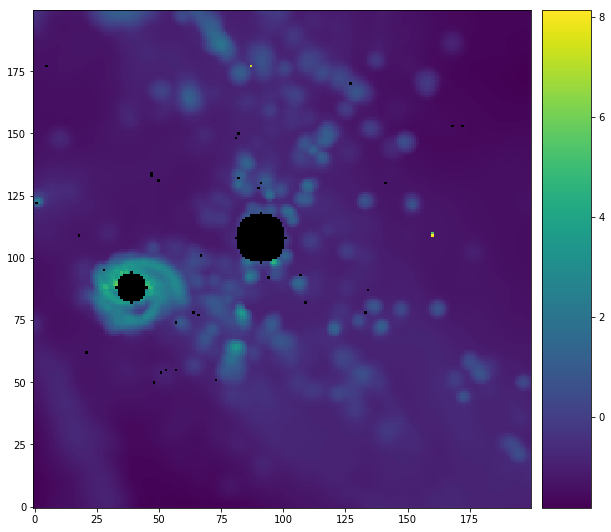

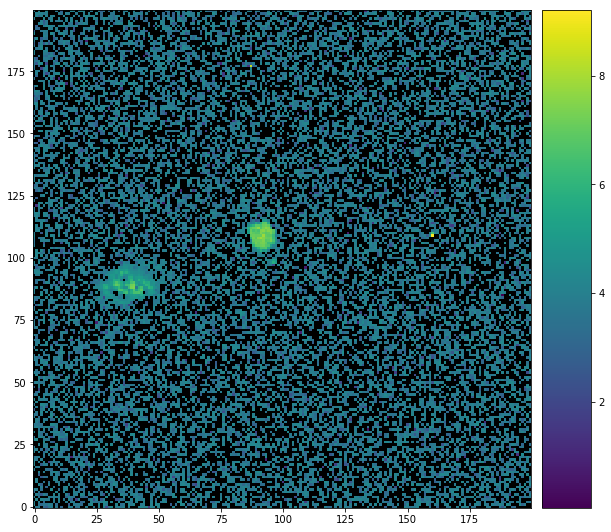

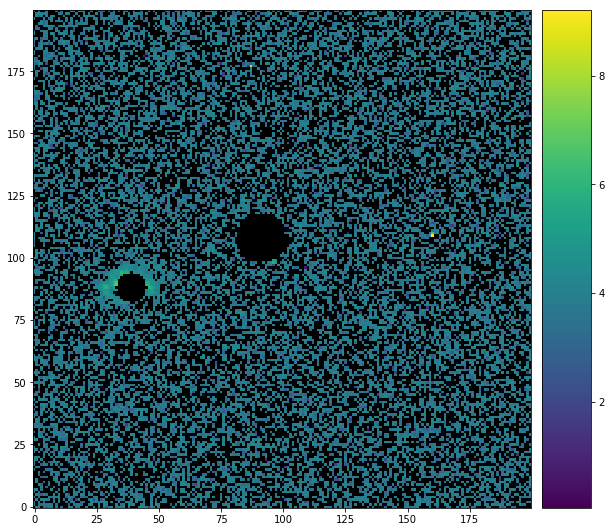

In [114]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 16))
plotdata(rawsim_cutout.T,ax=ax1,colorbar=True)#,bounds=bounds)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 16))
plotdata(rawsimmasked_cutout.T,ax=ax1,colorbar=True)#,bounds=bounds)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 16))
plotdata(np.log10(noise_cutout-768000.0-27648000.0-76310797.0337).T,ax=ax1,colorbar=True)#,bounds=bounds)
# subtracted off the mean noise I added in - it is printed out above

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 16))
plotdata(np.log10(noisemasked_cutout-768000.0-27648000.0-76310797.0337).T,ax=ax1,colorbar=True)#,bounds=bounds)


In [115]:
noisemasked_cutout.data.shape


(200, 200)

The smaller circle is about 30 - 40 kpc in diameter.

### Now I will bin the data a few times with the mask to show what the dealio is...

In [116]:
def niceplot(data, ax=None, verbose=True):
    
    addnoisesqrt = False

    # Plot the subtracted noiseadded data
    if ax is None:
        fig = plt.figure(figsize = (9.5, 5.))
        ax  = plt.subplot(111)

    # Plot the data nicely
    median = np.median(data);
    sig = np.sqrt(median)

    mymax = median + 100000*sig
    mymin = median - 5*sig
    if verbose:
        print 'median: %s, sig: %s' %(median,sig)
        print 'mymax: %s, mymin: %s' % (mymax,mymin)
    
    SBdata_clipped = data
    print np.min(SBdata_clipped),np.max(SBdata_clipped)

    SBdata_clipped[SBdata_clipped < mymin] = mymin
    print np.min(SBdata_clipped),np.max(SBdata_clipped)

    SBdata_clipped[SBdata_clipped > mymax] = mymax
    print np.min(SBdata_clipped),np.max(SBdata_clipped)
    
    SBdata_clipped = SBdata_clipped - mymin
    print np.min(SBdata_clipped),np.max(SBdata_clipped)
    
    #plotfilament(SBdata_clipped**0.25,ax1,contours=False,mockobs=True,colmap=mymap)
    #plotdata((SBdata_clipped**0.25).T,ax=ax,colorbar=True)#,bounds=bounds)
    plotdata(np.log10(SBdata_clipped).T,ax=ax,colorbar=True)#,bounds=bounds)

Will set mask to False since masking is set to False.

standard deviation: 885816.746748
standard deviation*0.005: 4429.08373374
min value: 104723961.417
median: 104726821.463
sqrt of the median (sig) is: 10233.6123369
mymin: 0
mymax: 104737055.075
104723961.417 104737055.075

standard deviation: 819064.113954
standard deviation*0.005: 4095.32056977
min value: 104723961.417
median: 104726810.169
sqrt of the median (sig) is: 10233.6117852
mymin: 0
mymax: 104737043.781
104723961.417 104737043.781


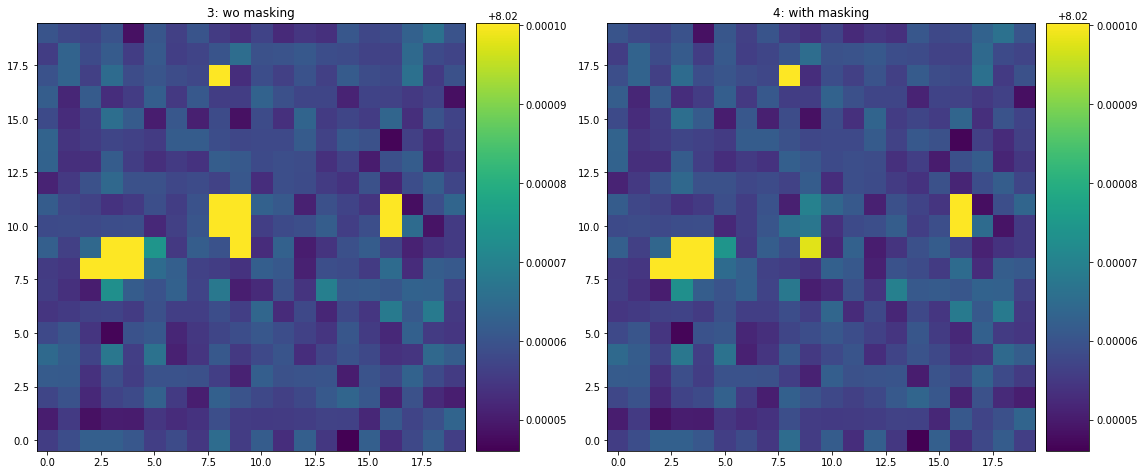

In [137]:
def clippeddata(lowres,mask=False):
    print ""
    print "standard deviation: %s"%np.std(lowres)
    print "standard deviation*0.005: %s"%(np.std(lowres)*0.005)
    print "min value: %s"%np.min(lowres)
    median = np.median(lowres)
    print "median: %s"%median
    
    sig = np.sqrt(np.abs(median))  # kind of works because for Poisson -> Gaussian, sigma is sqrt of mean ~ median
    print "sqrt of the median (sig) is: %s"%np.sqrt(median)
    
    mymax = median + 1*sig
    mymin = median - 4*sig
    mymin=0
    print "mymin: %s"%mymin
    print "mymax: %s"%mymax
    
    ##plotthis = np.log10(lowres+np.std(lowres)*0.005).T
    #clipped = lowres + np.abs(np.min(lowres))  
    #print "clipping all values below: %s"%(np.median(clipped)-5*sig)
    #print clipped[clipped<(np.median(clipped)-5*sig)]
    ##clipped[lowres<(np.median(clipped)-5*sigma)]=0 # this is what it was before
    clipped = lowres + 0
    clipped[clipped < mymin]=mymin 

    #mymax = np.median(clipped)+3*np.std(clipped)
    #print "clipping all values above: %s"%(np.std(clipped)*5.)
    #clipped[clipped>(np.median(clipped)+np.std(clipped)*5.)]=mymax
    clipped[clipped > mymax]=mymax

    print np.min(clipped),np.max(clipped)
    
    return np.log10(clipped)

factor = 10
# Plot the data (wo mask) and data (w mask)
lowres, mask_none, fillvalue_none = imreduce_masked(noisemasked_cutout.data, factor, log=False, masking=False) 
lowres_masked, _mask, _fillvalue = imreduce_masked(noisemasked_cutout.data,factor,mask=noisemasked_cutout.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(clippeddata(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(clippeddata(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()


standard deviation: 8252333.73945
standard deviation*0.005: 41261.6686973
min value: 104681064.183
median: 104726962.829
sqrt of the median (sig) is: 10233.6192439
mymin: 104716729.209
mymax: 104767897.306
0.0 104767897.306

standard deviation: 8204958.36459
standard deviation*0.005: 41024.7918229
min value: 104681064.183
median: 104726745.657
sqrt of the median (sig) is: 10233.6086332
mymin: 104716512.049
mymax: 104767680.092
0.0 104767680.092

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in log10




standard deviation: 4163889.44941
standard deviation*0.005: 20819.4472471
min value: 104706070.595
median: 104726900.211
sqrt of the median (sig) is: 10233.6161845
mymin: 104716666.595
mymax: 104767834.676
0.0 104767834.676

standard deviation: 4102523.11205
standard deviation*0.005: 20512.6155603
min value: 104706070.595
median: 104726802.6
sqrt of the median (sig) is: 10233.6114153
mymin: 104716568.988
mymax: 104767737.046
0.0 104767737.046
Will set mask to False since masking is set to False.
Will set mask to False since masking is set to False.

standard deviation: 885816.746748
standard deviation*0.005: 4429.08373374
min value: 104723961.417
median: 104726821.463
sqrt of the median (sig) is: 10233.6123369
mymin: 104716587.851
mymax: 104767755.912
104723961.417 104767755.912

standard deviation: 819064.113954
standard deviation*0.005: 4095.32056977
min value: 104723961.417
median: 104726810.169
sqrt of the median (sig) is: 10233.6117852
mymin: 104716576.557
mymax: 104767744.616
1

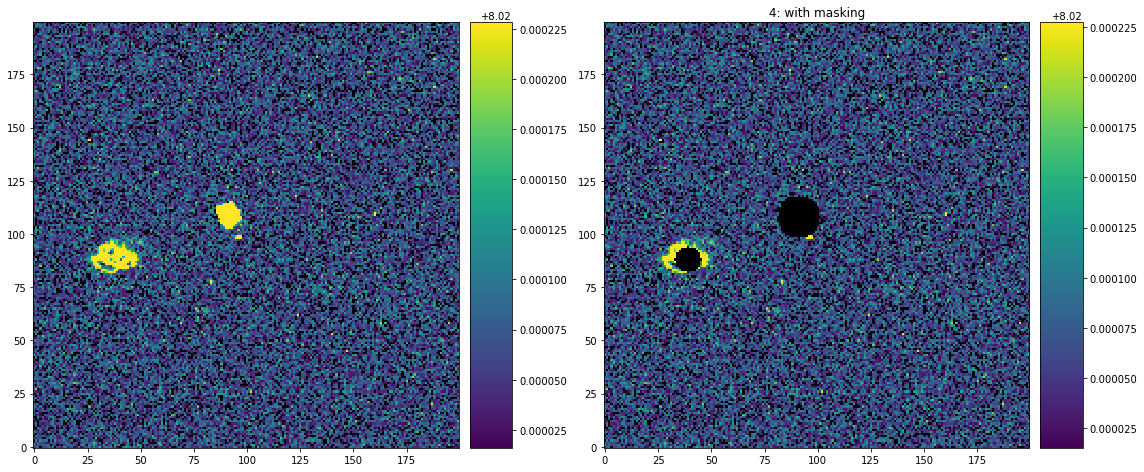

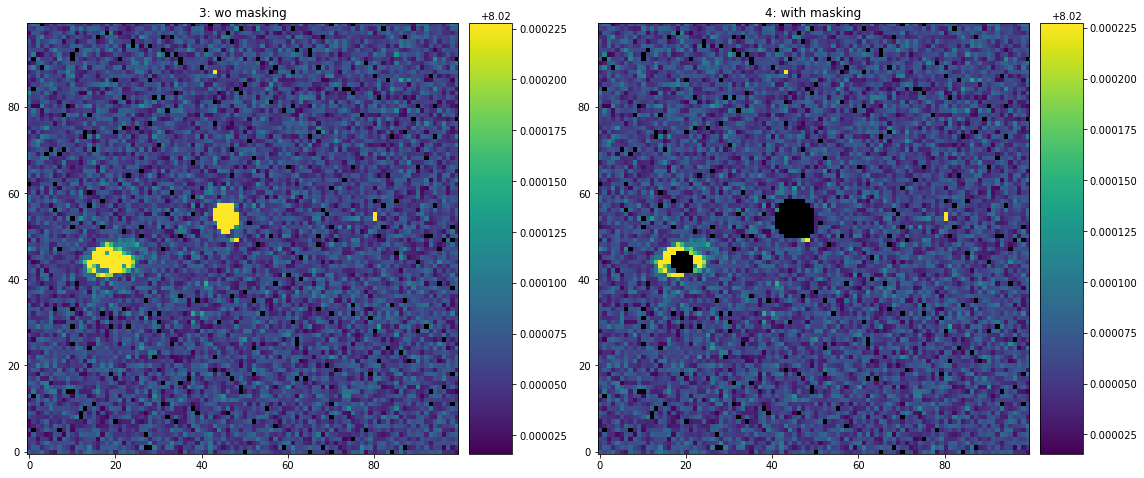

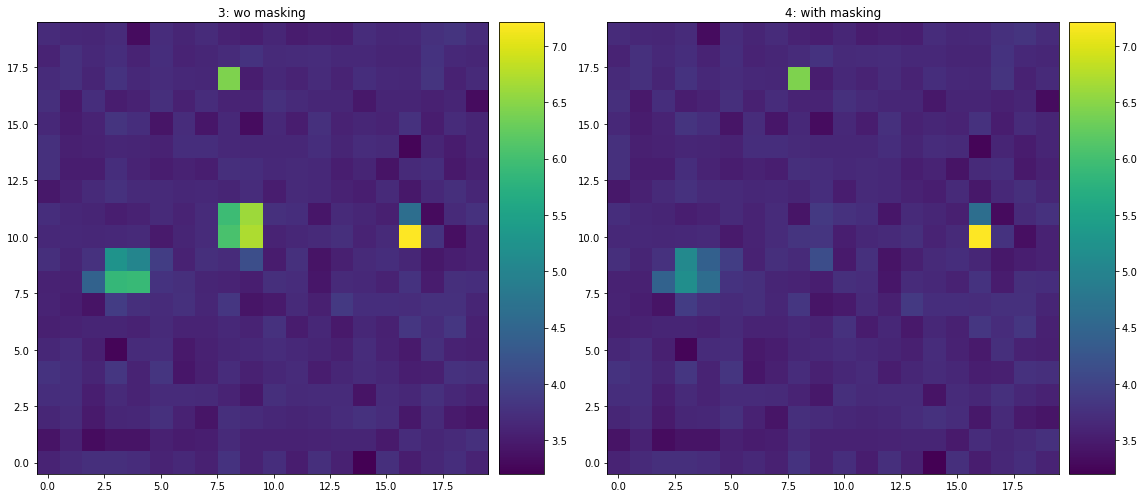

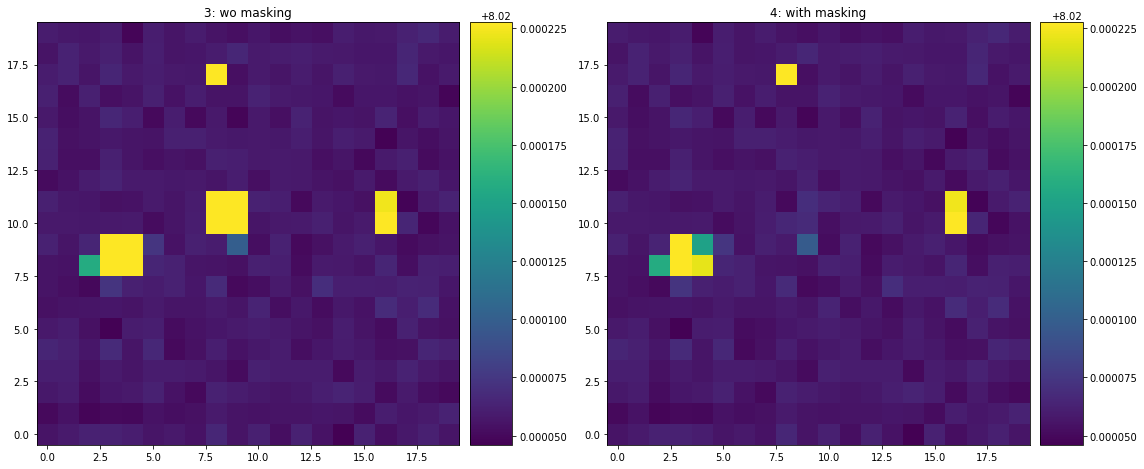

In [140]:
#data = mx_noisy.data
def clippeddata(lowres,mask=False):
    print ""
    print "standard deviation: %s"%np.std(lowres)
    print "standard deviation*0.005: %s"%(np.std(lowres)*0.005)
    print "min value: %s"%np.min(lowres)
    median = np.median(lowres)
    print "median: %s"%median
    
    sig = np.sqrt(np.abs(median))  # kind of works because for Poisson -> Gaussian, sigma is sqrt of mean ~ median
    print "sqrt of the median (sig) is: %s"%np.sqrt(median)
    
    mymax = median + 4*sig
    mymin = median - sig
    
    print "mymin: %s"%mymin
    print "mymax: %s"%mymax
    
    ##plotthis = np.log10(lowres+np.std(lowres)*0.005).T
    #clipped = lowres + np.abs(np.min(lowres))  
    #print "clipping all values below: %s"%(np.median(clipped)-5*sig)
    #print clipped[clipped<(np.median(clipped)-5*sig)]
    ##clipped[lowres<(np.median(clipped)-5*sigma)]=0 # this is what it was before
    clipped = lowres + 0
    clipped[clipped < mymin]=0#mymin 

    #mymax = np.median(clipped)+3*np.std(clipped)
    #print "clipping all values above: %s"%(np.std(clipped)*5.)
    #clipped[clipped>(np.median(clipped)+np.std(clipped)*5.)]=mymax
    clipped[clipped > mymax]=mymax

    print np.min(clipped),np.max(clipped)
    
    return np.log10(clipped)

constantnoise = -768000.0-27648000.0-76310797.0337

factor = 1
# Plot the data (wo mask) and data (w mask)
lowres = get_halpha_SB.imreduce(noisemasked_cutout.data, factor, log=False, method = 'average') 
lowres_masked, _mask, _fillvalue = imreduce_masked(noisemasked_cutout.data,factor,mask=noisemasked_cutout.mask,log=False,fillby='min')
#print np.std(lowres)
#print np.std(lowres)*0.005
#print np.min(lowres)
#print np.sqrt(np.median(lowres))
#sig = np.sqrt(np.median(lowres))  # kind of works because for Poisson -> Gaussian, sigma is sqrt of mean ~ median

#plotthis = np.log10(lowres+np.std(lowres)*0.005).T
#clipped = lowres + np.abs(np.min(lowres))  # add zero to try to remove the pointing between the two values
#print "clipping below: %s"%(np.median(clipped)-5*sig)
#clipped[lowres<(np.median(clipped)-5*sigma)]=0 
#trythis = np.log10(clipped)

#fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
#plotdata(np.log10(lowres+np.std(lowres)*0.005+constantnoise).T,ax=ax1,colorbar=True)#,bounds=bounds)
#ax1.set_title('3: wo masking')
#plotdata(clippeddata(lowres).T,ax=ax2,colorbar=True)#,bounds=bounds)
#ax2.set_title('3: wo masking')
##plotdata(np.log10(lowres_masked+np.std(lowres)*0.005).T,ax=ax2,colorbar=True)#,bounds=bounds)
##ax2.set_title('4: with masking')
#plt.tight_layout()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(clippeddata(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax2.set_title('3: wo masking')
plotdata(clippeddata(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

factor = 2
# Plot the data (wo mask) and data (w mask)
lowres = get_halpha_SB.imreduce(noisemasked_cutout.data, factor, log=False, method = 'average') 
lowres_masked, _mask, _fillvalue = imreduce_masked(noisemasked_cutout.data,factor,mask=noisemasked_cutout.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(clippeddata(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(clippeddata(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

factor = 10
# Plot the data (wo mask) and data (w mask)
lowres, mask_none, fillvalue_none = imreduce_masked(noisemasked_cutout.data, factor, log=False, masking=False) 
lowres_masked, _mask, _fillvalue = imreduce_masked(noisemasked_cutout.data,factor,mask=noisemasked_cutout.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(np.log10(lowres+np.std(lowres)*0.005+constantnoise).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(np.log10(lowres_masked+np.std(lowres)*0.005+constantnoise).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

factor = 10
# Plot the data (wo mask) and data (w mask)
lowres, mask_none, fillvalue_none = imreduce_masked(noisemasked_cutout.data, factor, log=False, masking=False) 
lowres_masked, _mask, _fillvalue = imreduce_masked(noisemasked_cutout.data,factor,mask=noisemasked_cutout.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(clippeddata(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(clippeddata(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

In [53]:
sigma = np.std(mx_noisy.data)
#data = (mx_noisy.data+5*np.std(mx_noisy.data))
#data = mx_noisy.data
print sigma
print data.shape 




2817447.39305
(1688, 1124)



standard deviation: 2817375.87699
standard deviation*0.005: 14086.879385
min value: 104675167.888
median: 104726811.973
sqrt of the median (sig) is: 10233.6118733

standard deviation: 2794723.40432
standard deviation*0.005: 13973.6170216
min value: 104675167.888
median: 104726784.165
sqrt of the median (sig) is: 10233.6105146

standard deviation: 752530.603682
standard deviation*0.005: 3762.65301841
min value: 104714788.546
median: 104726808.671
sqrt of the median (sig) is: 10233.611712

standard deviation: 711031.450054
standard deviation*0.005: 3555.15725027
min value: 104714788.546
median: 104726804.058
sqrt of the median (sig) is: 10233.6114866
Will set mask to False since masking is set to False.
Output grid must have a integer number of cells: trimming the array down to satisfy this.
Before reducing resolution, the original array was trimmed from size 1688,1124 to size 1680,1120.
Before reducing resolution, the original array was trimmed from size 1688,1124 to size 1680,1120.
Ou

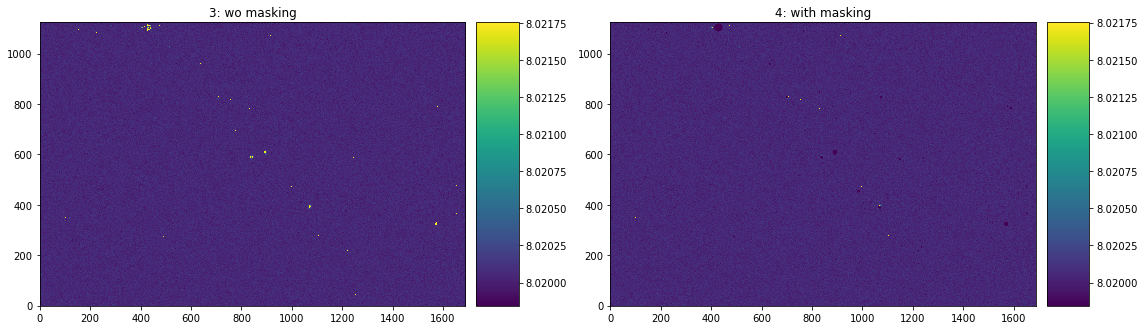

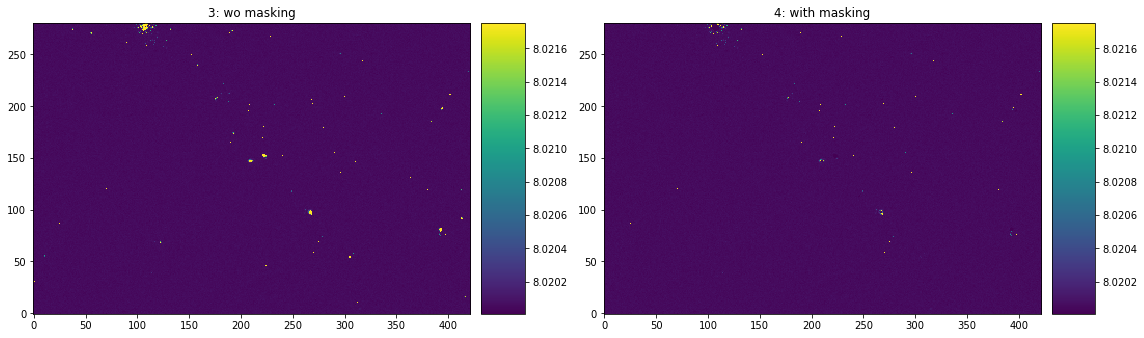

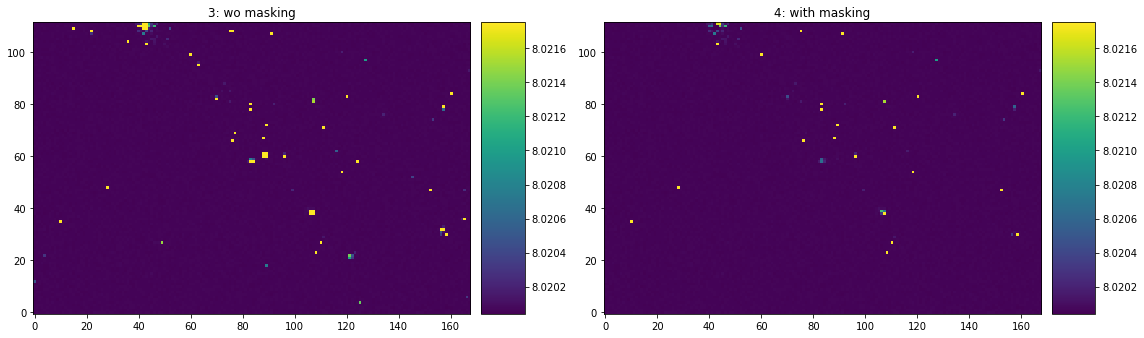

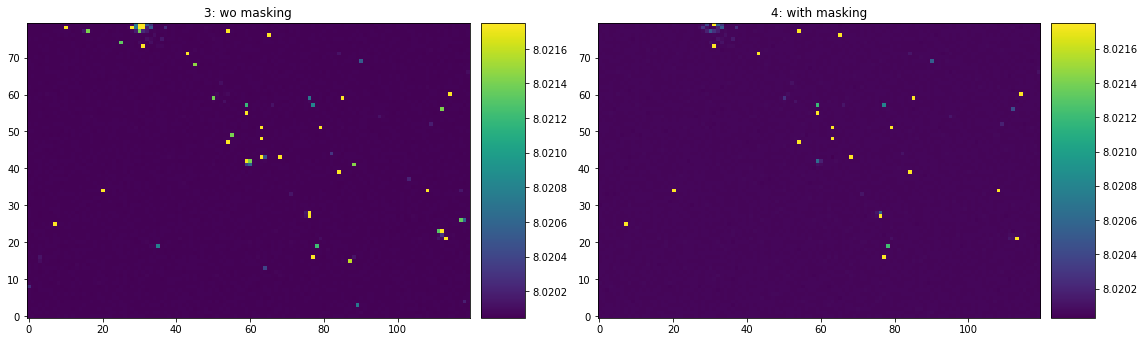

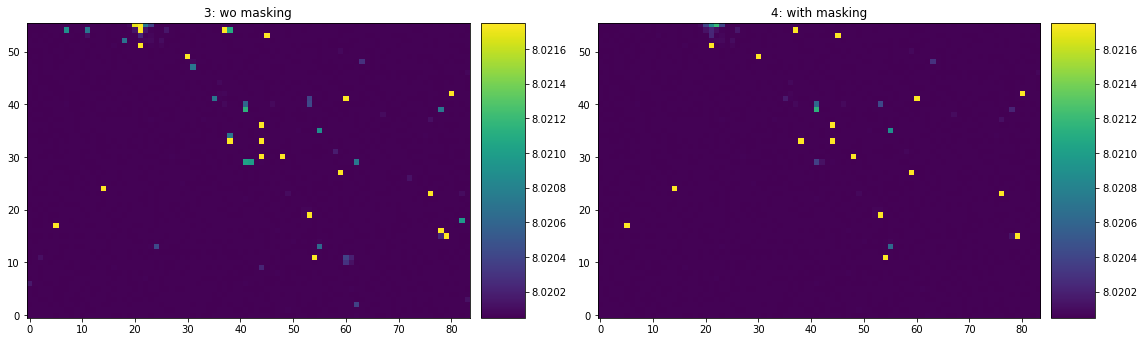

In [121]:

factor = 1
# Plot the data (wo mask) and data (w mask)
lowres = get_halpha_SB.imreduce(mx_noisy.data, factor, log=False, method = 'average') 
lowres_masked, _mask, _fillvalue= imreduce_masked(mx_noisy.data,factor,mask=mx_noisy.mask,log=False,fillby='min')

def clippeddata(lowres,mask=False):
    print ""
    print "standard deviation: %s"%np.std(lowres)
    print "standard deviation*0.005: %s"%(np.std(lowres)*0.005)
    print "min value: %s"%np.min(lowres)
    median = np.median(lowres)
    print "median: %s"%median
    
    sig = np.sqrt(np.abs(median))  # kind of works because for Poisson -> Gaussian, sigma is sqrt of mean ~ median
    print "sqrt of the median (sig) is: %s"%np.sqrt(median)
    
    mymax = median + 40*sig
    mymin = median - 50*sig
    
    ##plotthis = np.log10(lowres+np.std(lowres)*0.005).T
    #clipped = lowres + np.abs(np.min(lowres))  
    #print "clipping all values below: %s"%(np.median(clipped)-5*sig)
    #print clipped[clipped<(np.median(clipped)-5*sig)]
    ##clipped[lowres<(np.median(clipped)-5*sigma)]=0 # this is what it was before
    clipped = lowres + 0
    clipped[clipped < mymin]=0#mymin 

    #mymax = np.median(clipped)+3*np.std(clipped)
    #print "clipping all values above: %s"%(np.std(clipped)*5.)
    #clipped[clipped>(np.median(clipped)+np.std(clipped)*5.)]=mymax
    clipped[clipped > mymax]=mymax

    return np.log10(clipped)



fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(clippeddata(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(clippeddata(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

factor = 4
# Plot the data (wo mask) and data (w mask)
lowres = get_halpha_SB.imreduce(mx_noisy.data, factor, log=False, method = 'average') 
lowres_masked, _mask, _fillvalue = imreduce_masked(mx_noisy.data,factor,mask=mx_noisy.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(clippeddata(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(clippeddata(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

factor = 10
# Plot the data (wo mask) and data (w mask)
lowres, mask_none, fillvalue_none = imreduce_masked(mx_noisy.data, factor, log=False, masking=False) 
lowres_masked, _mask, _fillvalue= imreduce_masked(mx_noisy.data,factor,mask=mx_noisy.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(clippeddata(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(clippeddata(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

factor = 14
# Plot the data (wo mask) and data (w mask)
lowres, mask_none, fillvalue_none = imreduce_masked(mx_noisy.data, factor, log=False, masking=False) 
lowres_masked, _mask, _fillvalue= imreduce_masked(mx_noisy.data,factor,mask=mx_noisy.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(clippeddata(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(clippeddata(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

factor = 20
# Plot the data (wo mask) and data (w mask)
lowres, mask_none, fillvalue_none = imreduce_masked(mx_noisy.data, factor, log=False, masking=False) 
lowres_masked, _mask, _fillvalue= imreduce_masked(mx_noisy.data,factor,mask=mx_noisy.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(clippeddata(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(clippeddata(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()